BSD License:

CHISSL: Interactive Machine Learning

Copyright © 2021, Battelle Memorial Institute
All rights reserved.

1.       Battelle Memorial Institute (hereinafter Battelle) hereby grants permission to any person or entity lawfully obtaining a copy of this software and associated documentation files (hereinafter “the Software”) to redistribute and use the Software in source and binary forms, with or without modification.  Such person or entity may use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and may permit others to do so, subject to the following conditions:

* Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimers.
* Redistributions in binary form must reproduce the above copyright notice, this list of conditions and the following disclaimer in the documentation and/or other materials provided with the distribution.
* Other than as used herein, neither the name Battelle Memorial Institute or Battelle may be used in any form whatsoever without the express written consent of Battelle. 

2.       THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL BATTELLE OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.

In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_digits

OUTPUT_FOLDER = 'data'

data = load_digits()
X = data.data
y = data.target

os.makedirs(OUTPUT_FOLDER, exist_ok=True)

for i, (yi, img) in enumerate(zip(y, data.images)):
    fname = os.path.join(OUTPUT_FOLDER, f'{i}.png')
    if not os.path.exists(fname):
        plt.imsave(fname, img, cmap='binary', vmin=0, vmax=16)

In [2]:
import pandas as pd

# Default initial state
Add some labels in the tool then proceed to the rest of the notebook. Restart & Run all is not going to work.

In [10]:
import chissl

kwargs = dict(
    features=pd.DataFrame().assign(target=data.target),
    component='img',
    prefix=chissl.get_jupyter_url_from_local_path('data/'),
    suffix='.png'
)

self = chissl.ChisslWidget(X, **kwargs)

self

ChisslWidget(component='ChisslWidget', props={'parents': [2232, 3326, 2450, 2781, 2230, 2441, 2347, 1841, 2142…

# Take a look at the state variable
The state variable contains dictionaries corresponding to what you labeled in the tool. You can pass the state variable back in or you can pass in your own labels from an external source. Passing colors is optional and if missing will be arbitrarily assigned.

In [11]:
self.state

{'colors': {'Group 0': '#1f77b4',
  'Group 1': '#ff7f0e',
  'Group 2': '#2ca02c',
  'Group 3': '#d62728',
  'Group 4': '#9467bd',
  'Group 5': '#8c564b',
  'Group 6': '#e377c2',
  'Group 7': '#7f7f7f'},
 'labels': {'153': 'Group 2',
  '451': 'Group 4',
  '460': 'Group 7',
  '471': 'Group 1',
  '523': 'Group 5',
  '658': 'Group 6',
  '1177': 'Group 0',
  '1198': 'Group 3'}}

# Reproduce widget from existing state, i.e. your labels
Do not proceed to this step without labeling data using the widget, i.e., "Restart & Run All" will not work.

In [12]:
chissl.ChisslWidget(X, **self.state, **kwargs)

ChisslWidget(component='ChisslWidget', props={'parents': [2232, 3326, 2450, 2781, 2230, 2441, 2347, 1841, 2142…

# Rinse and Repeat (Semi-Supervised)
The following cell can be executed repeatedly after adding more labels in the tool. It will relearn the 2-d embedding semi-supervised on your labels

In [13]:
self = chissl.ChisslWidget(X,
    semi_supervised=True,
    **self.state,
    **kwargs
)

self

ChisslWidget(component='ChisslWidget', props={'parents': [2102, 3085, 2038, 2593, 2274, 2052, 2270, 2338, 2663…

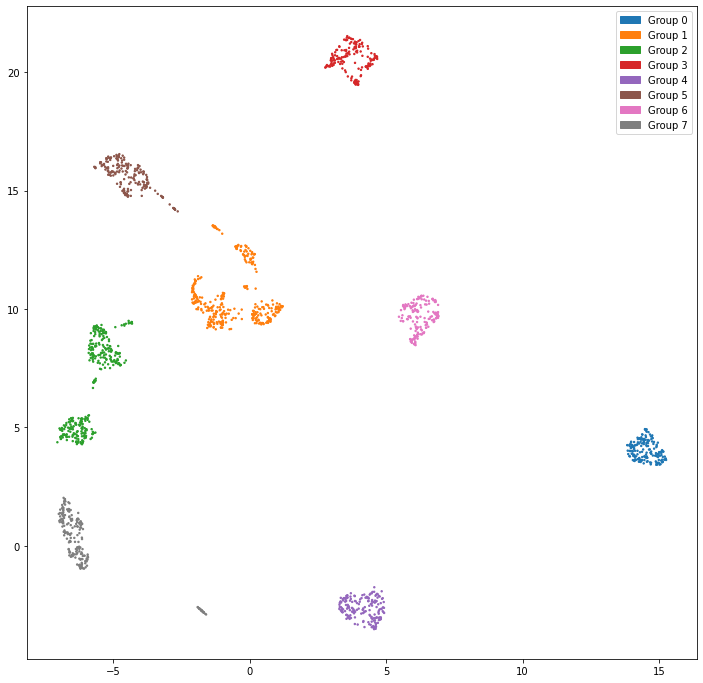

In [16]:
plt.figure(figsize=(12, 12))
self.scatter(s=2)